### Logistic Regression with ROC curve and ROC AUC SCORE

A way to find the threshold value for our Logistic Regression Model

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [5]:
# dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]

In [6]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [7]:
model_prob = model.predict_proba(X_test)
model_prob

array([[4.40523288e-02, 9.55947671e-01],
       [1.56737066e-02, 9.84326293e-01],
       [6.36173738e-02, 9.36382626e-01],
       [1.84519502e-02, 9.81548050e-01],
       [7.25277813e-01, 2.74722187e-01],
       [1.26653986e-01, 8.73346014e-01],
       [8.23827243e-01, 1.76172757e-01],
       [5.09281309e-02, 9.49071869e-01],
       [9.54391746e-01, 4.56082539e-02],
       [3.04518953e-01, 6.95481047e-01],
       [9.92431871e-01, 7.56812903e-03],
       [1.69734804e-01, 8.30265196e-01],
       [1.80789832e-01, 8.19210168e-01],
       [6.87727220e-01, 3.12272780e-01],
       [9.38910930e-01, 6.10890702e-02],
       [8.15494733e-01, 1.84505267e-01],
       [9.86661394e-01, 1.33386061e-02],
       [9.62173829e-01, 3.78261706e-02],
       [9.37259776e-01, 6.27402241e-02],
       [5.03768361e-01, 4.96231639e-01],
       [6.67550330e-03, 9.93324497e-01],
       [3.46421733e-02, 9.65357827e-01],
       [2.18495938e-01, 7.81504062e-01],
       [3.06930788e-01, 6.93069212e-01],
       [9.539549

In [8]:
# focusing on just output = 1

model_prob = model_prob[:,1]

In [9]:
# ROC, AUC score
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob) 
model_auc = roc_auc_score(y_test,model_prob)

print("Dummy Model Accuracy",dummy_model_auc)
print("Model Accuracy",model_auc)

Dummy Model Accuracy 0.5
Model Accuracy 0.8816491727450632


In [17]:
# calculate ROC Curve (True Positive Rate vs False Positive Rate)

dummy_fpr,dummy_tpr,dummy_threshold = roc_curve(y_test,dummy_model_prob) 
model_fpr,model_tpr,model_threshold = roc_curve(y_test,model_prob)

In [18]:
model_threshold

array([           inf, 9.99898595e-01, 9.93324497e-01, 9.92247925e-01,
       9.87347087e-01, 9.87237355e-01, 9.72649796e-01, 9.71958138e-01,
       9.55947671e-01, 9.55302792e-01, 9.54605041e-01, 9.53789429e-01,
       9.33708485e-01, 9.30879554e-01, 8.93559903e-01, 8.89654294e-01,
       8.77877746e-01, 8.73346014e-01, 8.67908875e-01, 8.67118111e-01,
       8.55004009e-01, 8.53912702e-01, 8.30265196e-01, 8.30082054e-01,
       8.23233857e-01, 8.19210168e-01, 8.08889918e-01, 8.02983669e-01,
       7.91802020e-01, 7.87474206e-01, 7.73888559e-01, 7.57845870e-01,
       7.10524402e-01, 7.08114896e-01, 7.03952987e-01, 6.93069212e-01,
       6.92783773e-01, 6.92134837e-01, 6.91368258e-01, 6.77921089e-01,
       6.63843632e-01, 6.46189685e-01, 6.25139713e-01, 6.18779681e-01,
       6.13887374e-01, 6.05562022e-01, 5.88302798e-01, 5.82393865e-01,
       5.75526559e-01, 5.37567921e-01, 5.09913640e-01, 4.12898943e-01,
       4.10301430e-01, 4.04025698e-01, 3.92885638e-01, 3.83622491e-01,
      

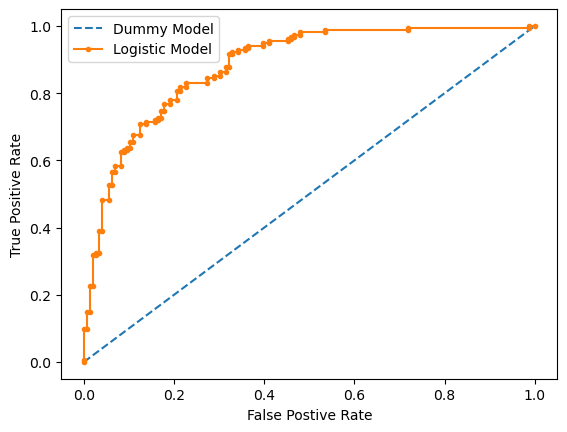

In [22]:
# plot ROC-Curve for the model
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic Model')

plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.legend()